In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load('assignment8_X.npy')
Y = np.load('assignment8_Y.npy')

In [3]:
X.shape, Y.shape

((25, 10), (25, 10))

In [4]:
n = 10   ## number of input neurons
k = n    ## number of output neurons

t = 25   ## number of examples

m_values = [10,25,50] ## m = number of hidden neurons

alpha = 0.01
steps = 500

### helper functions

In [5]:
def create_tensor(a, b, c):
    rows = b
    cols = c

    tensor_data = []

    for j in range(a): 
        data = []
        for r in range(rows):
            if r == j:
                row = [1] * cols
            else:
                row = [0] * cols
            data.append(row)
        tensor_data.append(data)

    tensor = np.array(tensor_data)
    return tensor

### linear

In [6]:
def nn_1hiddenlayer_linear(m):
    
    step_list = []
    mse_list = []
    
    print("--------- M: %s --------" % m)
    
    #initialize random weights
    W1 = 0.1 * np.random.randn(m,n)
    W2 = 0.1 * np.random.randn(n,m)

    for step in range(steps+1):
        step_list.append(step)

        #calculate current MSE
        def calc_H2(X_i, Y_i):
            H1 = np.dot(W1,X_i) 
            H2 = np.dot(W2,H1)
            return H2

        out_data = [calc_H2(X[i], Y[i]) for i in range(X.shape[0])]
        outputs = np.array(out_data)

        mse = ((Y - outputs) ** 2).mean(axis=None)
        mse_list.append(mse)
        
        if step % 100 == 0:
            print("step: %d, mse: %f" % (step, mse))

        gradW1_L = []
        gradW2_L = []

        for i in range(t):
            X_i = X[i] 
            Y_i = Y[i]

            #forward propagation
            H1 = np.dot(W1,X_i) 
            H2 = np.dot(W2,H1)

            #backward propagation
            
            #dH2_dW2
            dW2 = create_tensor(k, k, m) * H1
            
            dH1_dW1 = create_tensor(m,m,k) * X_i
            
            #dH2_dW1
            dW1 = np.tensordot(W2,dH1_dW1,1)

            #calculate differences between fW and Y
            output_diff = (H2 - Y_i) ## (10,)

            W1_L = np.tensordot(output_diff, dW1, 1)
            W2_L = np.tensordot(output_diff, dW2, 1)

            gradW1_L.append(W1_L)
            gradW2_L.append(W2_L)

        gradW1_L = sum(gradW1_L) * 2. / t
        gradW2_L = sum(gradW2_L) * 2. / t

        W1 = W1 - alpha * gradW1_L
        W2 = W2 - alpha * gradW2_L
    
    plt.plot(step_list,mse_list)
    plt.show()
    
    print("final W1 * W2:")
    print(W1.dot(W2))

--------- M: 10 --------
step: 0, mse: 0.488387
step: 100, mse: 0.198067
step: 200, mse: 0.174732
step: 300, mse: 0.166541
step: 400, mse: 0.163149
step: 500, mse: 0.161410


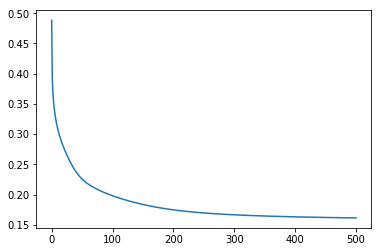

final W1 * W2:
[[ 0.0713823   0.06536129 -0.02032377 -0.04453108  0.04032719  0.08562018
  -0.04165035 -0.02987559 -0.04527004  0.13348955]
 [-0.05692946  0.1285577  -0.08777797  0.04261906  0.04424489  0.00664937
  -0.20442441  0.12421224 -0.02241456 -0.02194434]
 [-0.09066633  0.08679256 -0.02299934  0.06334789  0.04001452  0.04327496
  -0.02348943 -0.12217502  0.04987565  0.13591192]
 [ 0.0920132  -0.03392753 -0.02830028  0.00033625  0.00712196 -0.0242836
   0.01598219 -0.00069191 -0.11159836 -0.05246108]
 [-0.03342752  0.05090552 -0.02701849  0.05188386 -0.07032886 -0.01193486
  -0.01551482 -0.08350541 -0.0265459  -0.05876008]
 [ 0.05288555  0.07898752  0.06353011 -0.04529646 -0.00572438  0.04946959
  -0.07464557 -0.02512539  0.00515931 -0.01805026]
 [ 0.06750759 -0.07792468 -0.02473975 -0.02924944 -0.00963589 -0.03791828
  -0.17907779 -0.09031938  0.16669256  0.16878583]
 [-0.09265266 -0.07531225  0.0373893   0.03952782 -0.01131497 -0.0242915
  -0.01620644  0.09902611  0.04575233 

In [7]:
nn_1hiddenlayer_linear(10)

--------- M: 25 --------
step: 0, mse: 0.786331
step: 100, mse: 0.169471
step: 200, mse: 0.161605
step: 300, mse: 0.160249
step: 400, mse: 0.160017
step: 500, mse: 0.159977


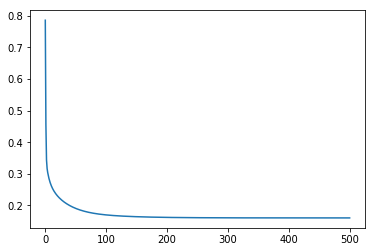

final W1 * W2:
[[-5.32980342e-03  4.40998875e-02 -7.70602491e-02 -1.83217011e-02
  -2.89514653e-02  2.72231723e-02  1.79631433e-02 -4.81344159e-02
  -3.46862939e-02  8.42795606e-03 -9.25897827e-03 -5.92352771e-02
  -1.74787871e-02  3.76820228e-03 -2.04226069e-02 -1.75113584e-02
   7.83677336e-03 -3.64880168e-03 -2.79232713e-02  1.05983983e-02
  -6.19860767e-02  1.93805978e-02  4.65638409e-02  1.82880110e-03
  -3.81832580e-02]
 [-3.86504807e-02 -2.56598126e-02  2.60140190e-02 -1.86399772e-02
  -1.98164522e-02  8.13857601e-02 -1.82873142e-02  5.28727245e-02
  -3.08230796e-02 -2.21411671e-02 -4.85466409e-02 -1.09465319e-02
   8.44578660e-04 -7.67226456e-02 -2.65166051e-02  1.43474104e-02
  -4.93297458e-02  8.91281633e-03  1.97699550e-02  1.72148230e-02
  -3.94500037e-02 -3.09278300e-02  7.67044917e-02 -4.57056646e-02
  -3.69459080e-03]
 [-8.52829585e-02  5.39557074e-02 -2.92055206e-02 -4.00595257e-03
   4.29112143e-02  8.49320889e-02 -2.62247470e-02  1.37474321e-02
  -4.04621378e-02  2.78

In [8]:
nn_1hiddenlayer_linear(25)

--------- M: 50 --------
step: 0, mse: 0.943545
step: 100, mse: 0.162288
step: 200, mse: 0.160129
step: 300, mse: 0.160060
step: 400, mse: 0.159970
step: 500, mse: 0.159967


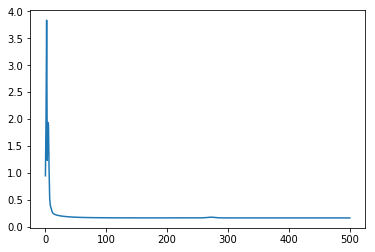

final W1 * W2:
[[ 0.02274108 -0.0042084   0.0419901  ... -0.05264125 -0.01212687
  -0.02942622]
 [-0.02171572 -0.00616443  0.01440141 ...  0.03181905 -0.00871683
  -0.00745003]
 [ 0.03951081 -0.00063719 -0.02019912 ... -0.05775945  0.0182752
   0.00213065]
 ...
 [-0.01650777  0.00601242  0.04257687 ... -0.00035649  0.00688435
  -0.0019997 ]
 [-0.0169968   0.02352888 -0.01803342 ...  0.04322603  0.00504788
   0.00671284]
 [ 0.0028087   0.02002097 -0.03653074 ...  0.04021431  0.00590754
   0.02684609]]


In [9]:
nn_1hiddenlayer_linear(50)

### sigmoidal

In [10]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

In [11]:
def nn_1hiddenlayer_sigmoidal(m):
    
    step_list = []
    mse_list = []
    
    print("--------- M: %s --------" % m)
    
    #initialize random weights
    W1 = 0.1 * np.random.randn(m,n)
    W2 = 0.1 * np.random.randn(n,m)

    for step in range(steps+1):
        step_list.append(step)

        #calculate current MSE
        def calc_H2(X_i):
            V = np.dot(W1,X_i) 
            H1 = sigmoid(V)
            H2 = np.dot(W2,H1)
            return H2

        out_data = [calc_H2(X[i]) for i in range(X.shape[0])]
        outputs = np.array(out_data)

        mse = ((Y - outputs) ** 2).mean(axis=None)
        mse_list.append(mse)
        
        if step % 100 == 0:
            print("step: %d, mse: %f" % (step, mse))

        gradW1_L = []
        gradW2_L = []

        for i in range(t):
            X_i = X[i] 
            Y_i = Y[i]

            #forward propagation
            V = np.dot(W1,X_i) 
            H1 = sigmoid(V)
            H2 = np.dot(W2,H1)

            #backward propagation
            dH2_dW2 = create_tensor(k, k, m) * H1
            dH2_dV = W2.dot(np.diag(sigmoid(V) * (1-sigmoid(V))))
            dV_dW1 = create_tensor(m,m,k) * X_i
            dH2_dW1 = np.tensordot(W2,dV_dW1,1)
            
            dW2 = dH2_dW2
            dW1 = dH2_dW1

            #calculate differences between fW and Y
            output_diff = (H2 - Y_i) ## (10,)

            W1_L = np.tensordot(output_diff, dW1, 1)
            W2_L = np.tensordot(output_diff, dW2, 1)

            gradW1_L.append(W1_L)
            gradW2_L.append(W2_L)

        gradW1_L = sum(gradW1_L) * 2. / t
        gradW2_L = sum(gradW2_L) * 2. / t

        W1 = W1 - alpha * gradW1_L
        W2 = W2 - alpha * gradW2_L
    
    plt.plot(step_list,mse_list)
    plt.show()
    
    print("final W1 * W2:")
    print(W1.dot(W2))

--------- M: 10 --------
step: 0, mse: 0.371991
step: 100, mse: 0.274487
step: 200, mse: 0.260502
step: 300, mse: 0.254230
step: 400, mse: 0.245776
step: 500, mse: 0.238090


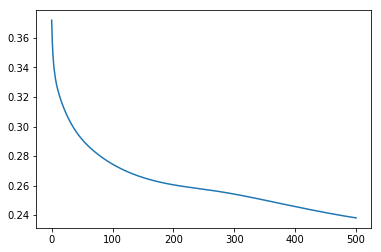

final W1 * W2:
[[ 0.88462414  0.48682686  0.55268422  0.20627728  1.33869556  0.89189703
  -0.14760996  0.68407949 -0.12451505 -0.83594034]
 [ 0.81052562  0.3806828   0.09735403  0.21207     0.91634544  0.40201055
   0.61244563  0.7403815   0.31033767 -0.93377929]
 [ 0.3732858   0.12206296  0.53352805  0.4495656   0.40598513  0.08731025
  -0.09403412  0.76626034  0.08458503  0.08373935]
 [ 0.83688758  0.51729738  0.90584675  0.79259113  1.41588929  0.58935637
   0.09504596  1.27844205  0.42270932 -1.13244681]
 [ 0.44459602 -0.50245985 -0.78520692 -0.21650771 -0.35635505 -0.20563135
   0.02015403 -0.30045407 -0.78299243  0.98928203]
 [ 0.21385089  0.29726171 -0.39526052 -0.02900739 -1.55071653  0.21871646
   1.53604352  0.31446754 -0.15956431 -0.58261556]
 [-0.21959622  0.20118511  0.3013029  -0.08076451 -0.03376719  0.2602158
  -0.16698413 -0.07287614 -0.04979945 -0.62690402]
 [ 1.29429126  0.53387911  0.20703541  0.2030417   2.01458445  0.84782513
   0.34720424  1.26011338  0.43548657

In [12]:
nn_1hiddenlayer_sigmoidal(10)

--------- M: 25 --------
step: 0, mse: 0.410431
step: 100, mse: 0.239578
step: 200, mse: 0.230304
step: 300, mse: 0.230005
step: 400, mse: 0.219950
step: 500, mse: 0.214864


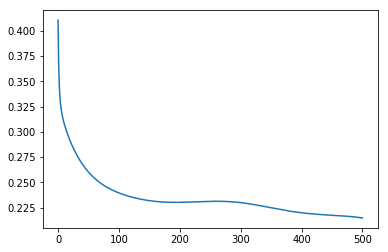

final W1 * W2:
[[-2.44657824e-01 -2.58197724e-02 -3.53278037e-02 -2.11362867e-01
   5.17853046e-01 -2.92233583e-02  9.70382475e-02  1.00521902e-02
   2.10009063e-03 -2.27783966e-01  6.94693693e-02 -1.90605502e-02
   5.92656470e-02 -2.06173666e-01 -4.98645145e-03 -4.19971409e-01
  -1.10658782e-01 -3.36262994e-02 -5.34606573e-02 -5.46198178e-01
  -8.62951240e-02 -2.01762291e-01 -8.01682394e-02 -2.48078759e-02
   8.40426493e-03]
 [-3.03975916e-01  5.76007463e-01  2.59089737e-01 -8.33650113e-02
  -3.59527734e-01 -1.35871722e-02 -1.22614016e-01 -8.73878927e-02
   9.93176414e-02  7.77517364e-01 -1.94787865e-01  8.17495447e-02
   1.54648332e-02  2.24190582e-02  1.98213739e-01  3.35786339e-01
   2.11354058e-01  2.05855619e-02  2.33284408e-01  3.95349108e-01
   1.10826560e-01 -1.27640076e-02  6.73435078e-02  3.27505475e-02
   7.33181500e-02]
 [ 7.34166819e-01 -3.90005481e-01  1.81895088e-01  1.68188750e-01
  -1.08042327e+00  1.65020833e-01  5.06776103e-01 -6.23625531e-02
   1.22478505e-01  1.24

In [13]:
nn_1hiddenlayer_sigmoidal(25)

--------- M: 50 --------
step: 0, mse: 0.433981
step: 100, mse: 0.197123
step: 200, mse: 0.180441
step: 300, mse: 0.182111
step: 400, mse: 0.185415
step: 500, mse: 0.192608


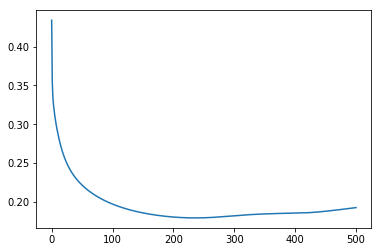

final W1 * W2:
[[-0.38196303  0.00127767  0.16313221 ...  0.07163226 -0.04494909
  -0.38166187]
 [-0.47705332  0.11900654  0.05061138 ... -0.19592522  0.05225361
   0.23125267]
 [-0.03970051 -0.00838377  0.16947233 ... -0.13316778  0.0613288
  -0.10762101]
 ...
 [ 0.33937968  0.11744534 -0.13989315 ...  0.24817687 -0.12919659
   0.1027654 ]
 [ 0.27226137  0.14025663  0.03336198 ... -0.12825739  0.16629057
   0.03930065]
 [-0.07792951  0.12520465  0.06830862 ... -0.1197328   0.00127195
   0.02308893]]


In [14]:
nn_1hiddenlayer_sigmoidal(50)